## Importing necessary libraries

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore") 

## Reading the data

In [213]:
df = pd.read_csv('Data/Customer_Data.csv', encoding='Windows-1252')

## Understanding the data

In [214]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [215]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Dealing with Missing Values

Based on the output below, the number of missing values is very small. Therefore, we can consider using mean or median imputation. To determine which imputation method to use, the following analysis provides us with insights.

In [216]:
missing_values_count = df.isnull().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values_count/len(df)) * 100

# Combine the results into a DataFrame
missing_data = pd.concat([missing_values_count, percent_missing], axis=1, keys=['Total', 'Percent'])

# Print the results
print("Number and percentage of missing values for each column:\n", missing_data)

Number and percentage of missing values for each column:
                                   Total   Percent
CUST_ID                               0  0.000000
BALANCE                               0  0.000000
BALANCE_FREQUENCY                     0  0.000000
PURCHASES                             0  0.000000
ONEOFF_PURCHASES                      0  0.000000
INSTALLMENTS_PURCHASES                0  0.000000
CASH_ADVANCE                          0  0.000000
PURCHASES_FREQUENCY                   0  0.000000
ONEOFF_PURCHASES_FREQUENCY            0  0.000000
PURCHASES_INSTALLMENTS_FREQUENCY      0  0.000000
CASH_ADVANCE_FREQUENCY                0  0.000000
CASH_ADVANCE_TRX                      0  0.000000
PURCHASES_TRX                         0  0.000000
CREDIT_LIMIT                          1  0.011173
PAYMENTS                              0  0.000000
MINIMUM_PAYMENTS                    313  3.497207
PRC_FULL_PAYMENT                      0  0.000000
TENURE                                0  0

The distributions of the variables with missing values show that they are right-skewed. Additionally, the descriptive statistics indicate that both variables have a high standard deviation, indicating the presence of outliers. This observation is further supported by the distributions shown below. Therefore, using mean imputation may further skew the data. Instead, opting for median imputation would be a better option in this case.

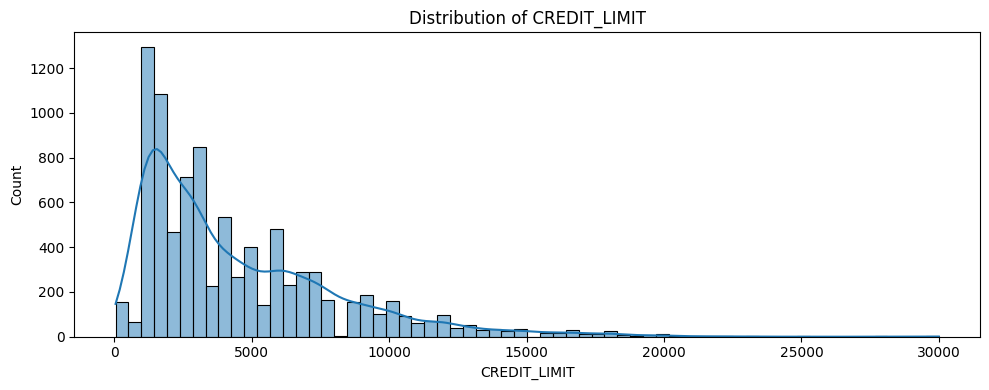

In [217]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='CREDIT_LIMIT', kde=True)
plt.title('Distribution of CREDIT_LIMIT')
plt.tight_layout()
plt.show()

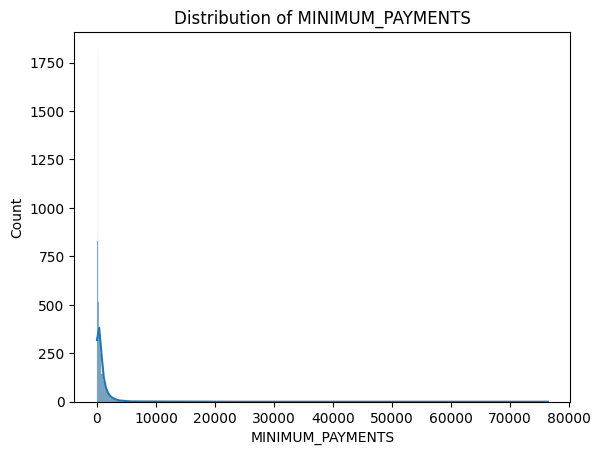

In [218]:
sns.histplot(data=df, x='MINIMUM_PAYMENTS', kde=True)
plt.title('Distribution of MINIMUM_PAYMENTS')
#plt.tight_layout()
plt.show()

Applying median imputation for the missing values

In [219]:
median_value = df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(median_value, inplace=True)

In [220]:
median_value = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_value, inplace=True)

In [221]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Dropping the 'CUST_ID' column as it is not required for further analysis or modeling.

In [222]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [223]:
#df.to_csv('Customer_Data_Cleaned.csv', index=False)

The correlation plot below reveals that most of the variables exhibit low correlation with each other. However, certain variables, such as ONEOFF_PURCHASES and PURCHASES, display a strong correlation with a coefficient of 0.92 suggesting that customers who make larger one-off purchases tend to have higher overall purchase amounts. Moreover, the variable PURCHASES demonstrates a correlation of over 0.5 with INSTALLEMENTS_PURCHASES, PURCHASES_TRX, and PAYMENTS, indicating that customers who engage in more frequent purchases, have a higher number of purchase transactions, or make larger payments are likely to have higher overall purchase amounts. Additionally, PURCHASES_INSTALLEMENT_FREQUENCY and PURCHASES_FREQUENCY exhibit a high correlation, implying that customers who frequently make purchases in installments are also likely to have higher overall purchase frequency.

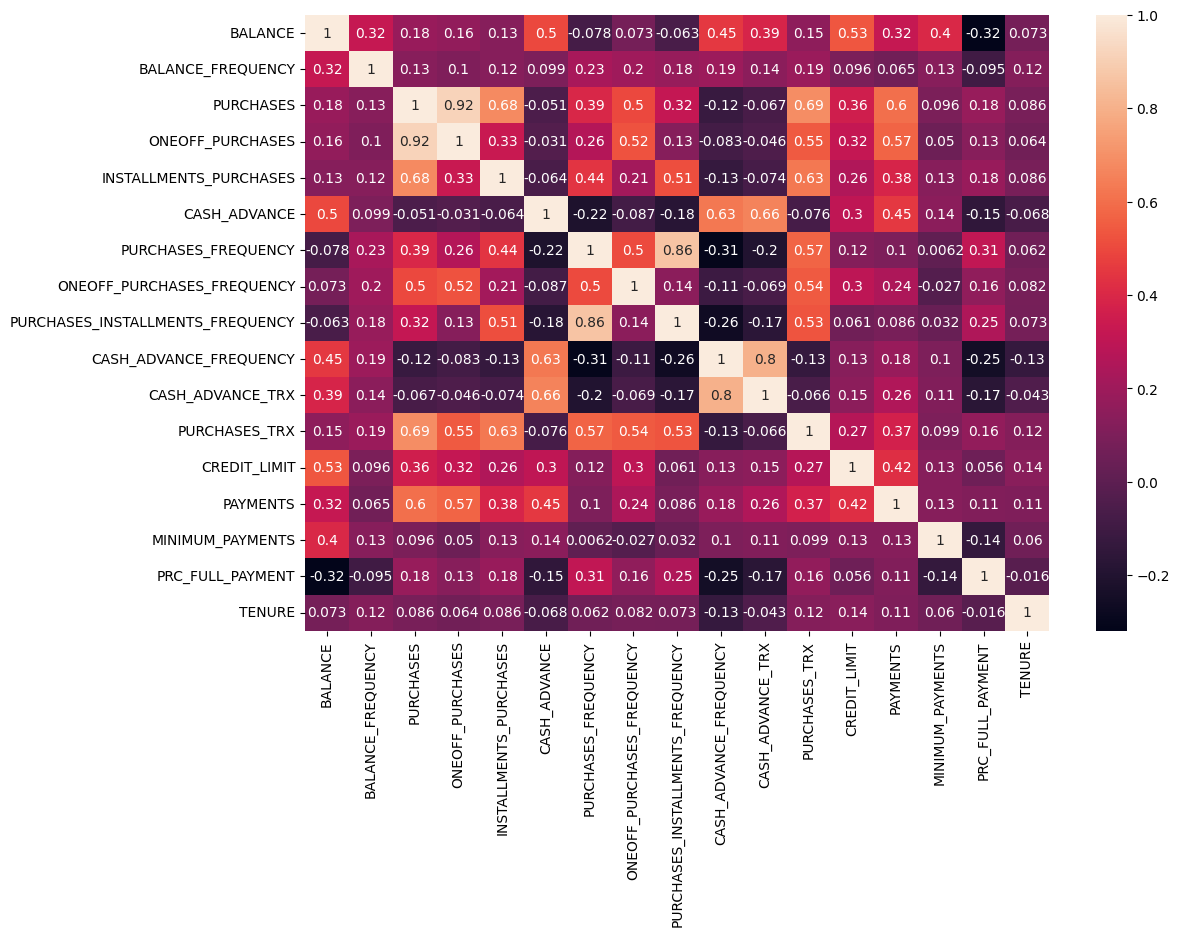

In [224]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Scaling the Data

In [225]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

## Dimensionality Reduction

In this scenario, Principal Component Analysis (PCA) is employed for dimensionality reduction. The purpose of using PCA is to condense the feature space while preserving the most important information. By applying PCA, the clusters formed using the PCA components exhibit better separation compared to the clusters formed without PCA. 

In [226]:
#defining 2 PCA components

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.683648,-1.072247
1,-1.134084,2.509129
2,0.969395,-0.383557
3,-0.888220,0.004645
4,-1.600021,-0.683800
...,...,...
8945,-0.362571,-2.013435
8946,-0.580810,-1.675665
8947,-0.928985,-1.808048
8948,-2.337845,-0.653618


## Hyperparameter tuning

Selecting the optimal value for the parameter k in clustering is a crucial aspect of the clustering process. The choice of k determines the number of clusters the algorithm will identify in the data. A well-selected k value can lead to meaningful and interpretable clusters, whereas a poor choice can result in ineffective or ambiguous clustering.

## Finding 'k' value by Elbow Method

Based on the graph obtained from the elbow method, it is observed that the graph exhibits a distinct change resembling an elbow shape at approximately k=4. Therefore, for the subsequent process, I have chosen k=4, 5, and 6 as the optimal values and will determine the best value by visualizing the clusters. 

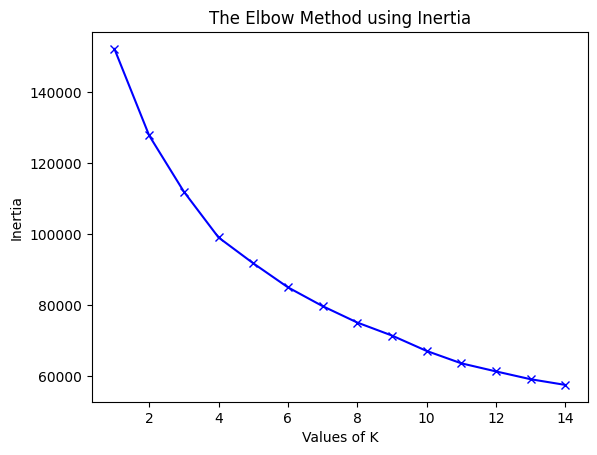

In [227]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## Modeling using KMeans Clustering

In this case, K-means clustering is the preferred choice over other clustering algorithms. The decision to use K-means is based on the fact that we have already identified the number of clusters beforehand. Unlike hierarchical clustering, where the data exhibits a hierarchy with important variables, K-means allows for a more straightforward partitioning of the data into distinct groups. Furthermore, Gaussian mixture models are not suitable for this scenario since the data does not appear to be generated from multiple Gaussian distributions. In this case, the data points do not exhibit a completely normal distribution, and therefore the assumption underlying Gaussian mixture models is not applicable.

In [228]:
kmeans_model4 = KMeans(n_clusters=4, init='k-means++')
kmeans_model4.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model4.labels_})], axis=1)

## Visualizing the Clusters

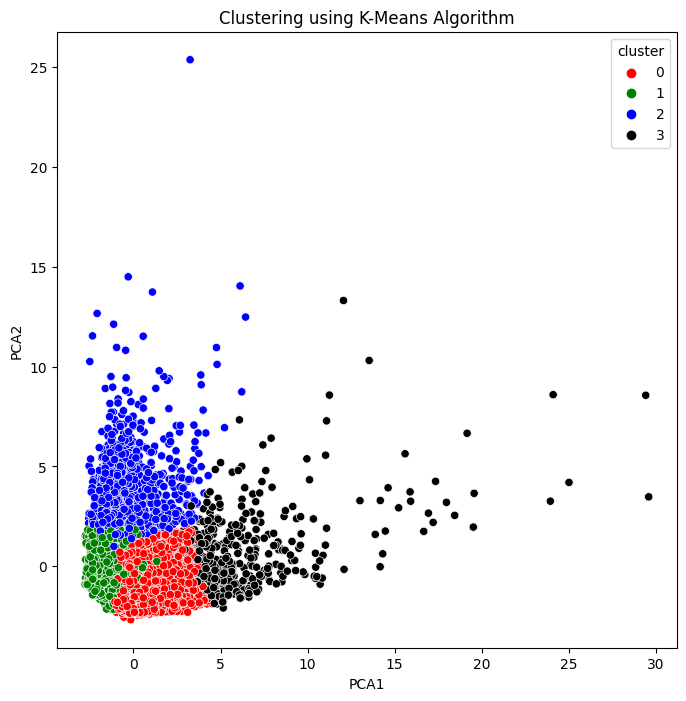

In [229]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

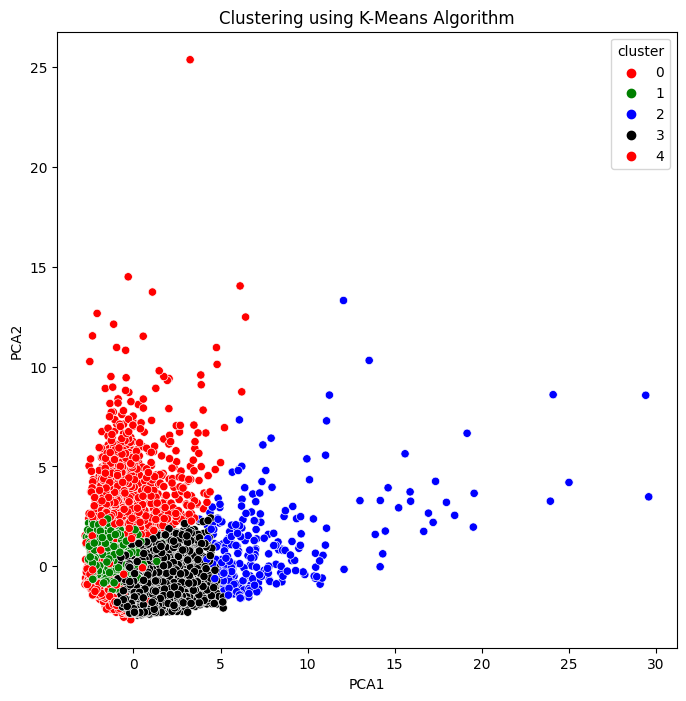

In [230]:
kmeans_model5 = KMeans(n_clusters=5, init='k-means++')
kmeans_model5.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model5.labels_})], axis=1)

plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

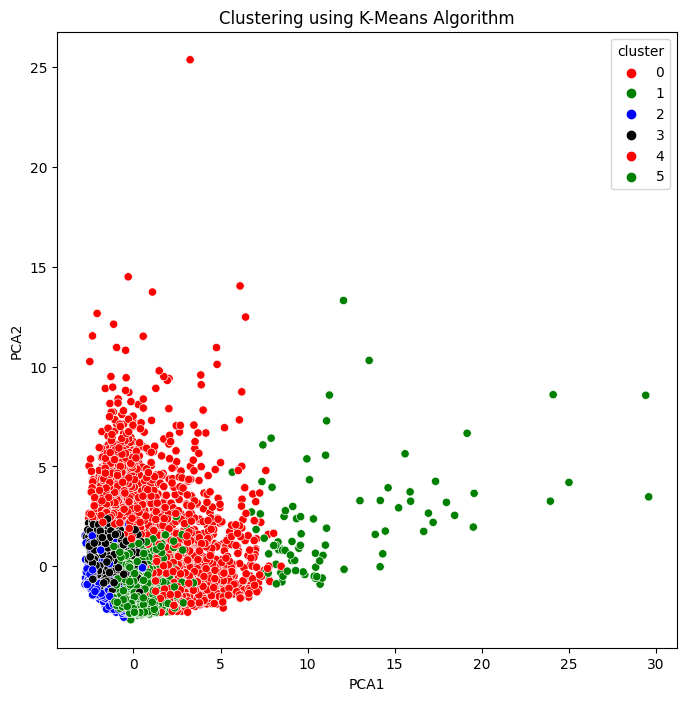

In [231]:
kmeans_model6 = KMeans(n_clusters=6, init='k-means++')
kmeans_model6.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model6.labels_})], axis=1)

plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

To determine the best value among all the above k values, the Silhouette scores are calculated for each of them.

Based on the output, it is observed that the silhouette score for k=6 is the highest among the evaluated k values. Therefore, considering this result, k=6 is selected for further analysis.

In [232]:
silhouette_avg4 = silhouette_score(scaled_df, kmeans_model4.labels_)
silhouette_avg5 = silhouette_score(scaled_df, kmeans_model5.labels_)
silhouette_avg6 = silhouette_score(scaled_df, kmeans_model6.labels_)
print("Silhouette Score for k=4:", silhouette_avg4)
print("Silhouette Score for k=5:", silhouette_avg5)
print("Silhouette Score for k=6::", silhouette_avg6)

Silhouette Score for k=4: 0.1976791965228765
Silhouette Score for k=5: 0.1912728398814557
Silhouette Score for k=6:: 0.20286011584987834


By creating a dataframe with cluster labels, the unsupervised problem has now been transformed into a supervised problem. With this new framework, it becomes possible to predict the cluster to which each customer belongs.

In [233]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model6.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model6.labels_})],axis=1)
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


Separate dataframes are created for each cluster to analyze the commonalities and patterns specific to each cluster.

In [234]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_4_df = cluster_df[cluster_df["Cluster"]==3]
cluster_5_df = cluster_df[cluster_df["Cluster"]==4]
cluster_6_df = cluster_df[cluster_df["Cluster"]==5]

In [235]:
#cluster_df.to_csv('Clustered_Customer_Data.csv', index=False)
#cluster_1_df.to_csv('Cluster1.csv', index=False)
#cluster_2_df.to_csv('Cluster2.csv', index=False)
#cluster_3_df.to_csv('Cluster3.csv', index=False)
#cluster_4_df.to_csv('Cluster4.csv', index=False)
#cluster_5_df.to_csv('Cluster5.csv', index=False)
#cluster_6_df.to_csv('Cluster6.csv', index=False)

Saving the choosen model

In [236]:
import joblib
joblib.dump(kmeans_model6, "kmeans_model.pkl")

['kmeans_model.pkl']

The below bar chart of the count of clusters

<Axes: xlabel='Cluster', ylabel='count'>

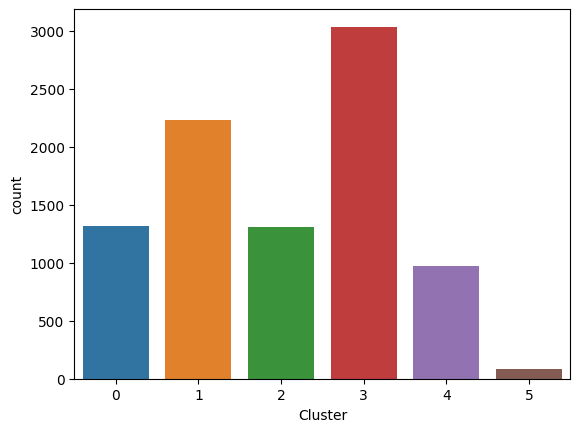

In [237]:
sns.countplot(x='Cluster', data=cluster_df)

## Classification Model

Now, since this is a supervised classification problem requiring predictions, various classification algorithms will be employed. The best model will be selected among them to make the final predictions.

First let us divide the dataframe into train and test sets. Here I am using 80-20 split

In [238]:
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

## Fitting using Descision Tree

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       280
           1       0.92      0.92      0.92       450
           2       0.96      0.97      0.96       260
           3       0.92      0.96      0.94       585
           4       0.91      0.84      0.87       204
           5       0.80      0.73      0.76        11

    accuracy                           0.93      1790
   macro avg       0.91      0.88      0.89      1790
weighted avg       0.93      0.93      0.92      1790



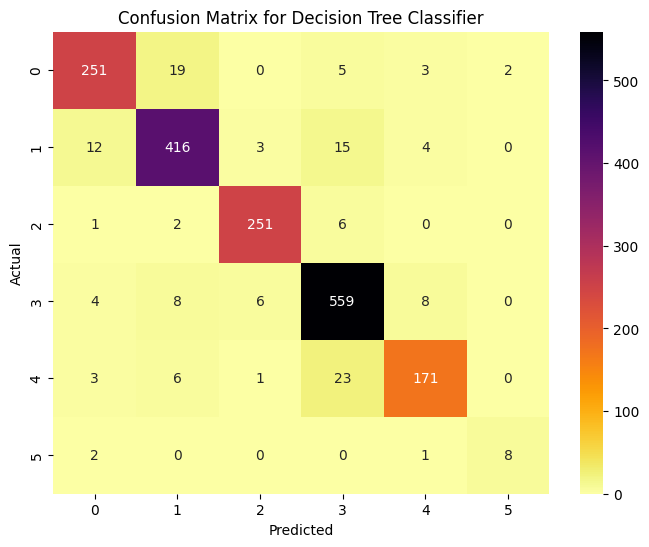

In [243]:
descision_tree= DecisionTreeClassifier(criterion="entropy")
descision_tree.fit(X_train, y_train)
y_pred = descision_tree.predict(X_test)

#Print Classification Report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='inferno_r', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Fitting using Random Forest

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       280
           1       0.94      0.97      0.96       450
           2       0.98      0.97      0.97       260
           3       0.97      0.97      0.97       585
           4       0.95      0.92      0.93       204
           5       1.00      0.82      0.90        11

    accuracy                           0.96      1790
   macro avg       0.97      0.93      0.95      1790
weighted avg       0.96      0.96      0.96      1790



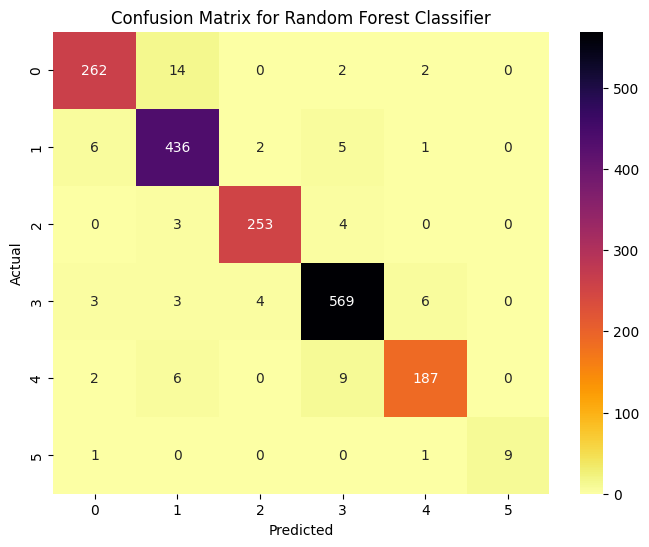

In [245]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='inferno_r', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


## Fitting using Gradient Boosting

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       280
           1       0.95      0.95      0.95       450
           2       0.97      0.98      0.98       260
           3       0.97      0.98      0.98       585
           4       0.95      0.93      0.94       204
           5       1.00      1.00      1.00        11

    accuracy                           0.96      1790
   macro avg       0.97      0.96      0.97      1790
weighted avg       0.96      0.96      0.96      1790



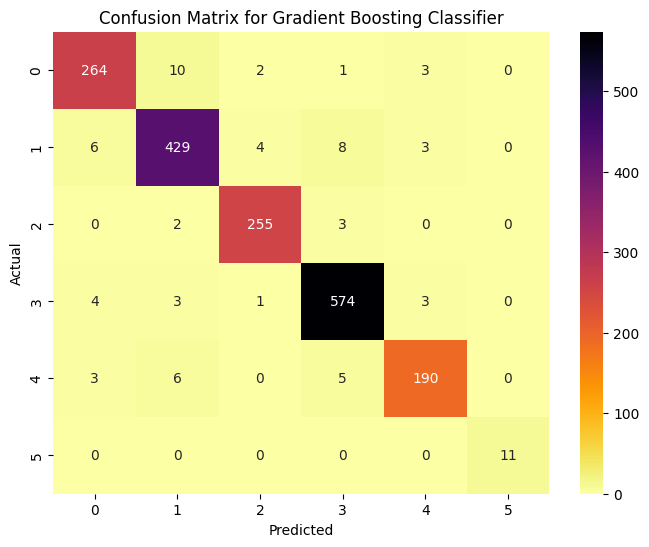

In [247]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='inferno_r', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


From the above results, both Random Forest and Gradient Boosting outperformed Decision Tree and are performing almost the same. When considering individual clusters, Gradient Boosting is performing slightly better than Random Forest. Therefore, we choose Gradient Boosting as the final model for our predictions.

## Saving the Gradient Boosting model for future prediction

In [250]:
import pickle
filename = 'final_model.sav'
pickle.dump(gradient_boosting, open(filename, 'wb'))

In [251]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9625698324022346 % Acuuracy
